***WARRANTY CLAIM***


**Business Statement :**

Fraud can take place in various forms, and it affects the industry economically, although not in equal measure. The sectors that deal with it uses various techniques to overcome the fraudulent cases. 


**Objective :**

The objective of the analysis is to predict an item when sold, what is the probability that customer would file fraudulent / Genuine warranty and to understand important factors associated with them.

**Attributes** :
Region - Customer region details

state - Current location of customer

Area - Area_Urban/rural

City- Customers current located city

Consumer_profile- Customer's work profile

Product_category- Product category

Product_type- Type of the product_Tv/Ac

AC_1001_Issue- 1001 is failure of Compressor in AC

AC_1002_Issue- 1002 is failure of Condenser Coil in AC

AC_1003_Issue- 1003 is failure of Evaporator Coil in AC

TV_2001_Issue- 2001 is failure of power supply in Tv

TV_2002_Issue- 2002 is failure of Inverter in Tv

TV_2003_Issue- 2003 is failure of Motherboard in Tv

claim_value- Customer's claim amount in Rs

Service_Centre- 7 Different service centers

Product_Age- Duration of the product purchased by customer

Purchased_from- From where product is purchased

Call_details- call duration in mins

Purpose- Purpose_compliant-Compliant raised by customer claim- claimed for the product Other- Other categories out of this

Fraud- '1'- fradulent claim, '0' Genuine claim

NOTE: '0' means to replace the component, 
'1' means partial damage of the component and with servicing component good work and 
'2' no issue with the component. 
This is for all the columns coded with '0','1','2'

# . Importing Required Libraries

In [1]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.8/99.8 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade dask pandas


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.2/1.2 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 kB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires dask==2022.7.0, but you have dask 2024.4.1 which is incompatible.


In [3]:
pip install --upgrade pandas lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 101.0/101.0 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<!-- Region - Customer region details
state - Current location of customer
Area - Area_Urban/rural
City- Customers current located city
Consumer_profile- Customer's work profile
Product_category- Product category
Product_type- Type of the product_Tv/Ac
AC_1001_Issue- 1001 is failure of Compressor in AC
AC_1002_Issue- 1002 is failure of Condenser Coil in AC
AC_1003_Issue- 1003 is failure of Evaporator Coil in AC
TV_2001_Issue- 2001 is failure of power supply in Tv
TV_2002_Issue- 2002 is failure of Inverter in Tv
TV_2003_Issue- 2003 is failure of Motherboard in Tv
claim_value- Customer's claim amount in Rs
Service_Centre- 7 Different service centers
Product_Age- Duration of the product purchased by customer
Purchased_from- From where product is purchased
Call_details- call duration in mins
Purpose- Purpose_compliant-Compliant raised by customer claim- claimed for the product Other- Other categories out of this
Fraud- '1'- fradulent claim, '0' Genuin claim
NOTE: '0' means to replace the component, '1' means partial damage of the component and with servicing component good work and '2' no issue with the component. This is for all the columns coded with '0','1','2' -->

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import copy as cp

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score

# Machine learning
import catboost
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report ,roc_auc_score ,f1_score


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


C:\Users\Kunal\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Kunal\AppData\Roaming\Python\Python310\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Loading Data**

In [2]:
df=pd.read_csv("train .csv")

In [3]:
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [6]:
df.columns

Index(['Unnamed: 0', 'Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

**Analyzing Data**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [14]:
df.describe()

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8101.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,13382.184750,0.268913,0.300563,0.190025,0.354274,0.433042,0.296247,14051.151586,12.832154,168.595013,10.709076,0.079847
std,21643.277349,0.572955,0.587182,0.500576,0.587451,0.639980,0.546295,13200.318156,1.724802,237.713181,11.610211,0.271072
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,2963.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4862.000000,12.000000,10.000000,1.500000,0.000000
50%,5991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000,0.000000
75%,8957.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20000.000000,14.000000,284.000000,22.000000,0.000000
max,99311.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [15]:
df['Area'].value_counts()

Area
Urban    5319
Rural    3022
Name: count, dtype: int64

In [16]:
df.isna().sum()

Unnamed: 0            0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

**Removing unnecessary column**

In [17]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

**Unique values of attributes :**

In [18]:
pd.DataFrame(df.nunique())

,0
Region,8
State,22
Area,2
City,27
Consumer_profile,2
Product_category,2
Product_type,2
AC_1001_Issue,3
AC_1002_Issue,3
AC_1003_Issue,3


 **Component Statistics** :

- '0' means to replace the component, 
- '1' means partial damage of the component and with servicing component good work.
- '2' no issue with the component. 

In [19]:
df['Product_category'].value_counts()

Product_category
Entertainment    4561
Household        3780
Name: count, dtype: int64

In [20]:
df['AC_1001_Issue'].value_counts()

AC_1001_Issue
0    6647
1    1145
2     549
Name: count, dtype: int64

In [21]:
df['AC_1002_Issue'].value_counts()

AC_1002_Issue
0    6395
1    1385
2     561
Name: count, dtype: int64

In [22]:
df['AC_1003_Issue'].value_counts()

AC_1003_Issue
0    7159
1     779
2     403
Name: count, dtype: int64

In [23]:
df['TV_2001_Issue'].value_counts()

TV_2001_Issue
0    5871
1    1985
2     485
Name: count, dtype: int64

In [24]:
df['TV_2002_Issue'].value_counts()

TV_2002_Issue
0    5413
1    2244
2     684
Name: count, dtype: int64

In [25]:
df['TV_2003_Issue'].value_counts()

TV_2003_Issue
0    6245
1    1721
2     375
Name: count, dtype: int64

**Replacing 'claim' with 'Claim'**

In [26]:
df.loc[(df.Purpose == "claim"), "Purpose"] = "Claim"  

In [27]:
df['Purpose'].value_counts()

Purpose
Claim        3927
Complaint    3527
Other         887
Name: count, dtype: int64

In [28]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



**Missing value imputation for 'claim_value'**

<Axes: >

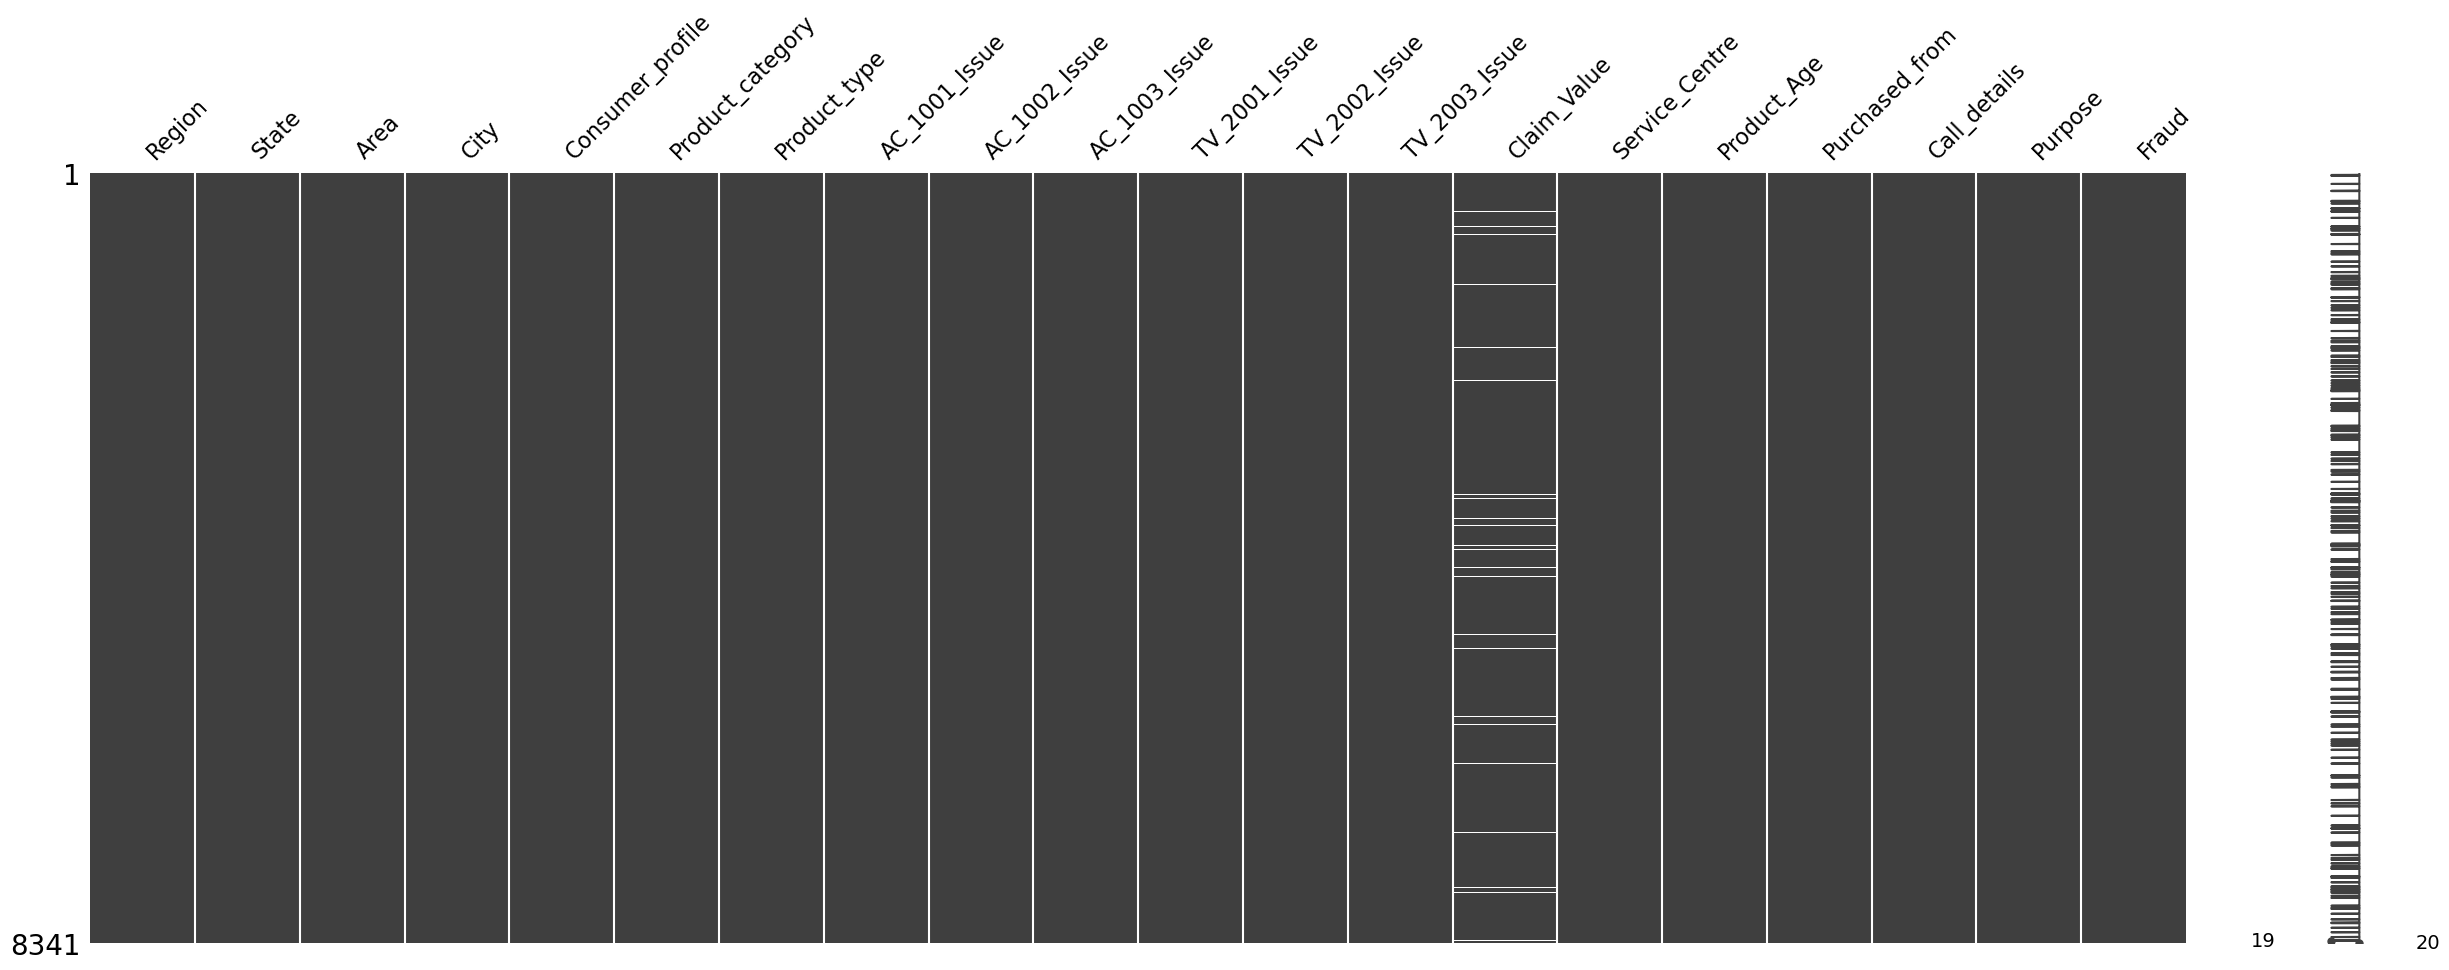

In [29]:
import missingno as msno
import pandas as pd
msno.matrix(df, figsize = (30,10))

In [30]:
df["Claim_Value"].value_counts().sort_values( ascending=[False])

Claim_Value
10000.0    889
15000.0    862
12000.0    772
50000.0    721
25000.0    683
          ... 
7760.0       3
5987.0       2
3651.0       1
7725.0       1
4396.0       1
Name: count, Length: 105, dtype: int64

In [31]:
df['Claim_Value'].describe()

count     8101.000000
mean     14051.151586
std      13200.318156
min          0.000000
25%       4862.000000
50%      10000.000000
75%      20000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

- **Mean : 14051.151586223923**
- **Median : 10000.0**

**Checking Skewness**

In [32]:
df['Claim_Value'].skew()

1.6649729039812524

- **The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.**

- **Mean-It is preferred if data is numeric and not skewed.**
- **Median-It is preferred if data is numeric and skewed.**

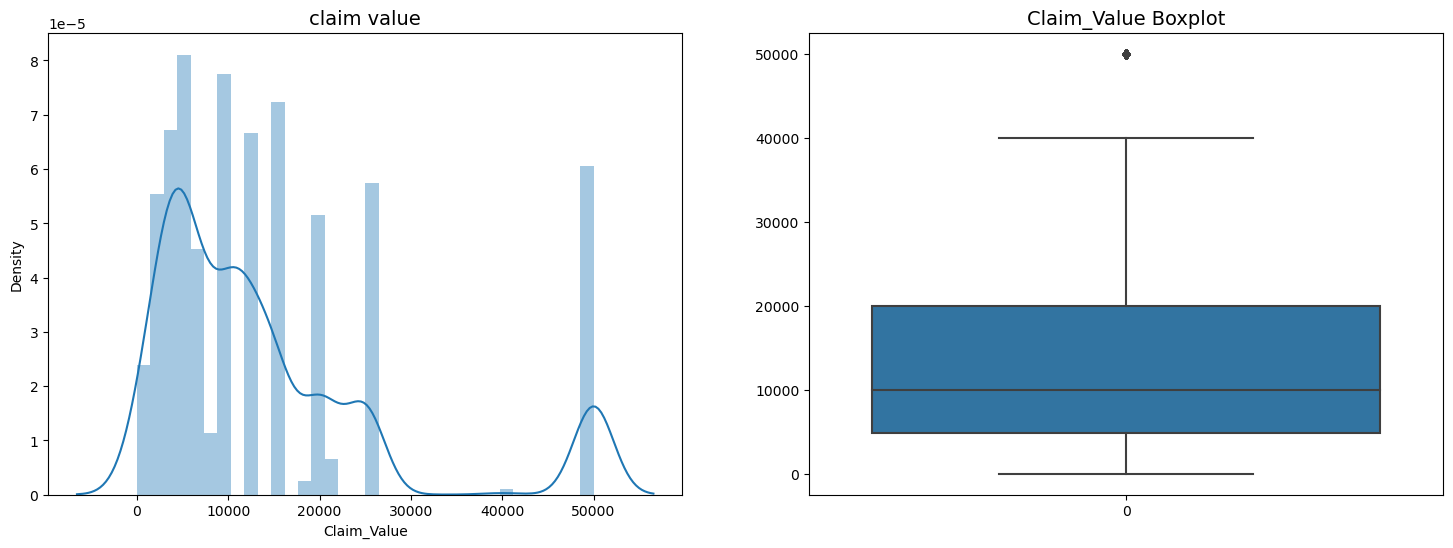

In [33]:
#checking Distributions
#claim_value

plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(df['Claim_Value'])
plt.title("claim value",fontsize=14)

plt.subplot(122)
sns.boxplot(df['Claim_Value'])
plt.title('Claim_Value Boxplot', fontsize=14)
plt.show()

**Imputing missing values with median of claim_value variable**


In [34]:
df["Claim_Value"].fillna(10000,inplace=True)

In [35]:
df['Claim_Value'].describe()

count     8341.000000
mean     13934.585661
std      13026.617005
min          0.000000
25%       5000.000000
50%      10000.000000
75%      20000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

# . Outlier Handling

In [36]:
float_col = list(df.select_dtypes(['float64']).columns)
float_col

['Claim_Value', 'Call_details']

In [37]:
int_col = list(df.select_dtypes(['int64']).columns)
int_col

['AC_1001_Issue',
 'AC_1002_Issue',
 'AC_1003_Issue',
 'TV_2001_Issue',
 'TV_2002_Issue',
 'TV_2003_Issue',
 'Service_Centre',
 'Product_Age',
 'Fraud']

## Checking Outliers

## IQR Method

In [38]:
for i in float_col:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=df[i][df[i]>high]
    y=df[i][df[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Claim_Value has ===>   721 outliers
Call_details has ===>   0 outliers


In [39]:
for i in float_col:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    print(low,high)
    print(iqr)

-17500.0 42500.0
15000.0
-29.25 52.75
20.5


In [40]:
df['Claim_Value'].quantile(.75)

20000.0

In [41]:
outlier=['Claim_Value']

In [42]:
p0_ = []
p100_ = []
iqr_ = []
high_ = []
low_ = []

for i in outlier:
    p0 =df[i].min()
    p100=df[i].max()
    
    p0_.append(p0)
    p100_.append(p100)

    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    
    iqr=q3-q1
    iqr_.append(iqr)
    
    low: int = q1 - (1.5 * iqr)
    high: int = q3 + (1.5 * iqr)
    
    low_.append(low)
    high_.append(high)

    

In [43]:
p0_

[0.0]

In [44]:
p100_

[50000.0]

In [45]:
high_ #iqr 75

[42500.0]

In [46]:
low_ #iqr 25

[-17500.0]

## Removing Outliers by flooring & capping

In [47]:
count = 0

for i in outlier:
    df[i] = df[i].clip(upper = high_[count], lower = low_[count])
    count+=1

In [48]:
for i in outlier:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    iqr= Q3 - Q1
    low = Q1 - (1.5*iqr)
    high = Q3 + (1.5*iqr)
    x=df[i][df[i]>high]
    y=df[i][df[i]<low]
    print(i,'has ===>  ',x.shape[0]+y.shape[0],'outliers')

Claim_Value has ===>   0 outliers


In [49]:
df['Claim_Value'].describe()

count     8341.000000
mean     13286.282100
std      11285.698131
min          0.000000
25%       5000.000000
50%      10000.000000
75%      20000.000000
max      42500.000000
Name: Claim_Value, dtype: float64

In [50]:
df['Claim_Value'].value_counts().sort_values(ascending=False)

Claim_Value
10000.0    1129
15000.0     862
12000.0     772
42500.0     721
25000.0     683
           ... 
7760.0        3
5987.0        2
3651.0        1
7725.0        1
4396.0        1
Name: count, Length: 105, dtype: int64

In [51]:
# How many unique kinds of Claim_Value are there?
print("There are {} unique values in Claim_Value.".format(len(df.Claim_Value.unique())))

There are 105 unique values in Claim_Value.


In [52]:
df['Claim_Value'].describe()

count     8341.000000
mean     13286.282100
std      11285.698131
min          0.000000
25%       5000.000000
50%      10000.000000
75%      20000.000000
max      42500.000000
Name: Claim_Value, dtype: float64

### Distributions 

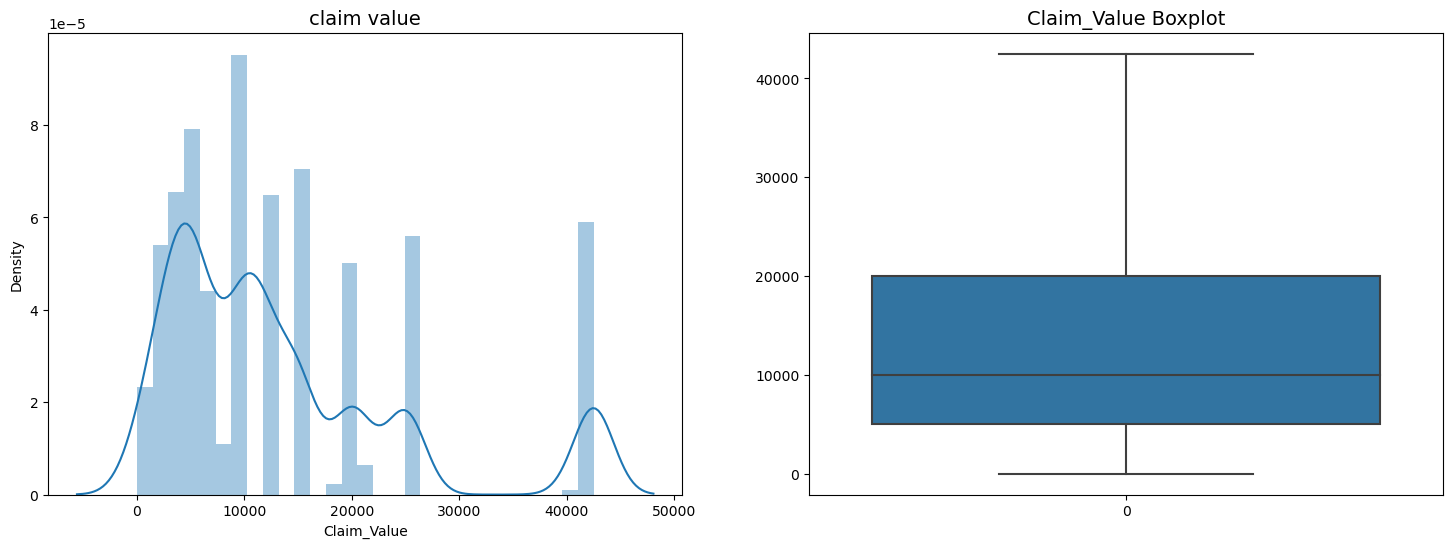

In [53]:
#claim_value
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(df['Claim_Value'])
plt.title("claim value",fontsize=14)

plt.subplot(122)
sns.boxplot(df['Claim_Value'])
plt.title('Claim_Value Boxplot', fontsize=14)
plt.show()

In [54]:
df['Product_Age'].describe()


count    8341.000000
mean      168.595013
std       237.713181
min         3.000000
25%        10.000000
50%        21.000000
75%       284.000000
max       991.000000
Name: Product_Age, dtype: float64

In [55]:
df['Product_Age'].sort_values().unique()

array([  3,   4,   5,   6,   7,   9,  10,  12,  14,  15,  16,  18,  19,
        20,  21,  22,  23,  26,  27,  30,  32,  35,  36,  39,  43,  45,
        46,  49,  52,  55,  57,  60,  61,  68,  72,  73,  79,  80,  81,
        94, 103, 108, 111, 112, 117, 118, 123, 125, 126, 131, 140, 147,
       148, 151, 152, 153, 154, 159, 160, 167, 170, 171, 173, 176, 180,
       187, 190, 193, 197, 199, 202, 205, 206, 210, 212, 213, 214, 218,
       219, 224, 233, 244, 247, 254, 257, 271, 274, 275, 276, 280, 281,
       282, 284, 287, 288, 289, 291, 293, 299, 300, 301, 303, 304, 309,
       311, 315, 323, 324, 327, 329, 330, 331, 332, 333, 335, 337, 338,
       340, 343, 345, 347, 349, 350, 353, 356, 363, 365, 370, 371, 377,
       383, 388, 391, 408, 409, 411, 444, 481, 487, 495, 497, 505, 522,
       530, 547, 550, 556, 574, 576, 609, 613, 625, 626, 672, 679, 683,
       698, 705, 721, 727, 746, 748, 758, 776, 790, 801, 804, 820, 821,
       824, 826, 827, 833, 854, 864, 872, 873, 883, 908, 914, 93

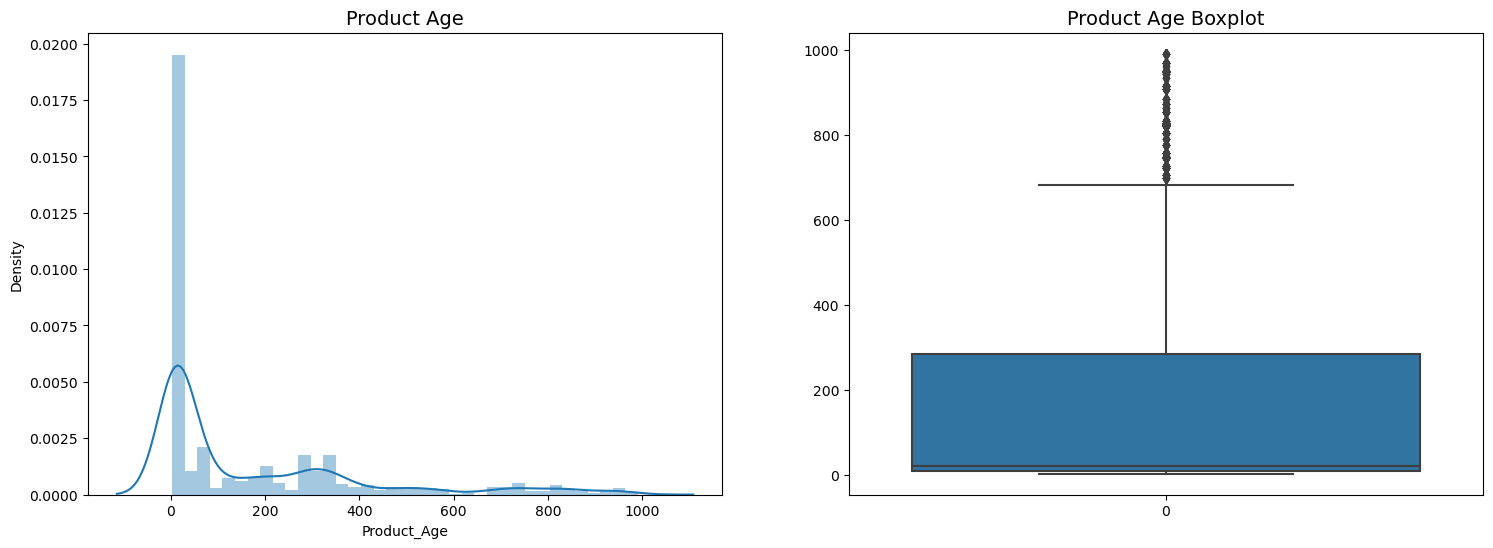

In [56]:
#Product_Age
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(df['Product_Age'])
plt.title("Product Age",fontsize=14)

plt.subplot(122)
sns.boxplot(df['Product_Age'])
plt.title('Product Age Boxplot', fontsize=14)
plt.show()

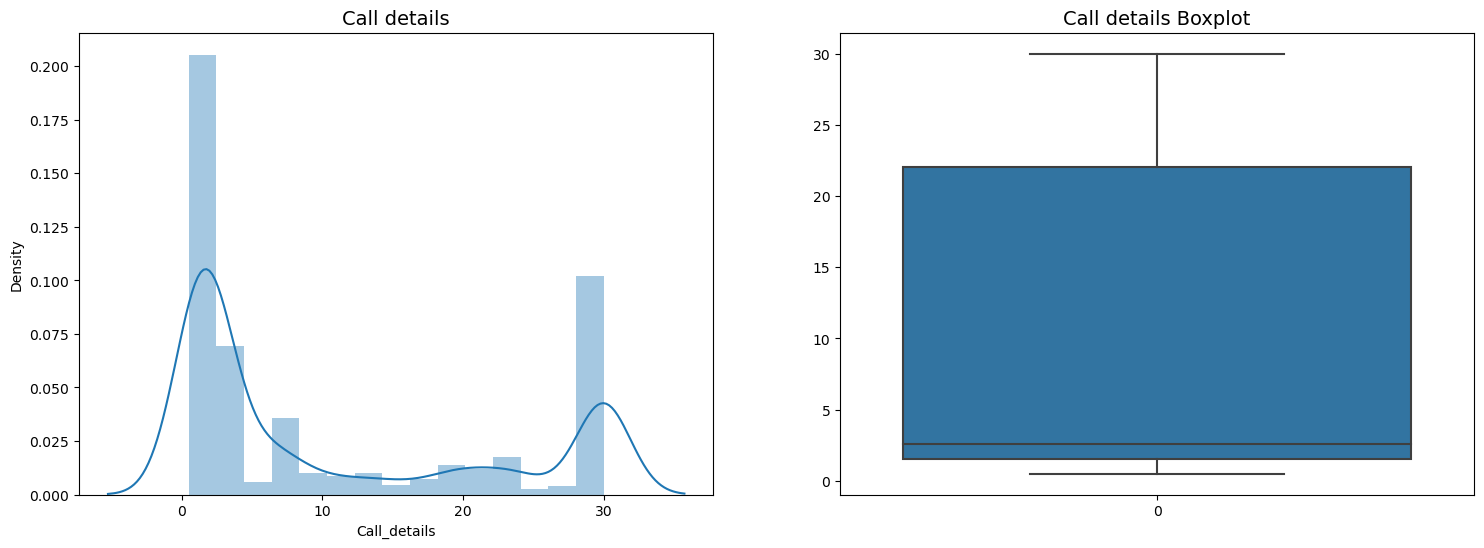

In [57]:
#Call_details
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.distplot(df['Call_details'])
plt.title("Call details",fontsize=14)

plt.subplot(122)
sns.boxplot(df['Call_details'])
plt.title('Call details Boxplot', fontsize=14)
plt.show()

# . Exploratory Data Analysis

Text(0.5, 1.0, 'Region Distribution')

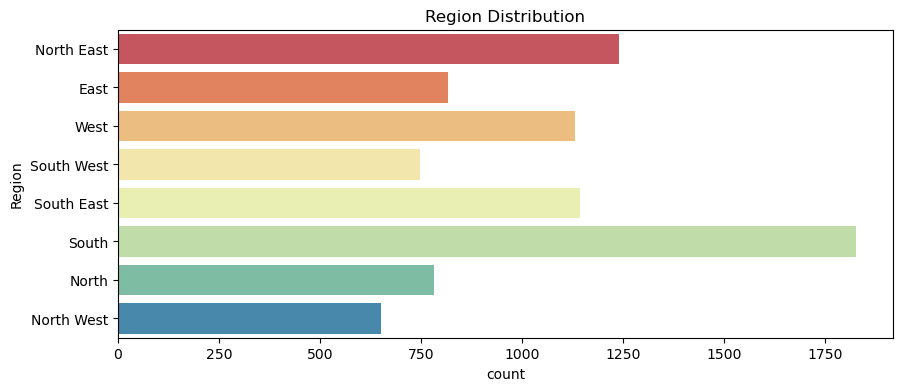

In [58]:
plt.figure(figsize=(10,4))
sns.countplot(y="Region",data=df, palette="Spectral")
plt.title('Region Distribution')

-  Most customers are from **south** of the states

Text(0.5, 1.0, 'Region Distribution with Claims')

<Figure size 200x200 with 0 Axes>

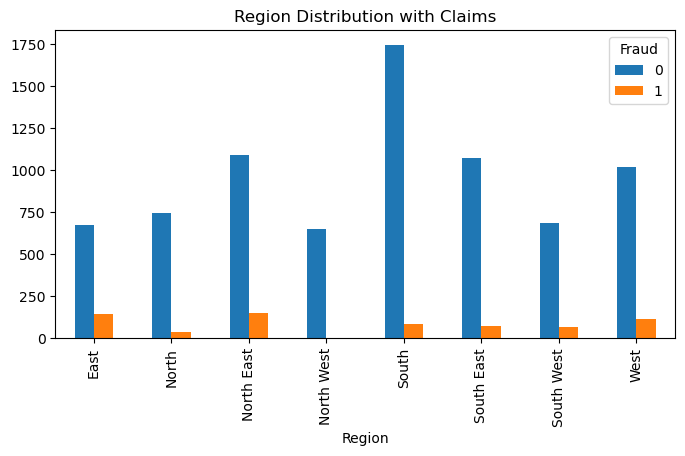

In [59]:
plt.figure(figsize=(2,2))
pd.crosstab(df.Region,df.Fraud).plot(kind="bar",figsize=(8, 4))
plt.title('Region Distribution with Claims')

- In **North East** region there is **least fraud claim**

Text(0.5, 1.0, 'Statewise Distribution of Customers')

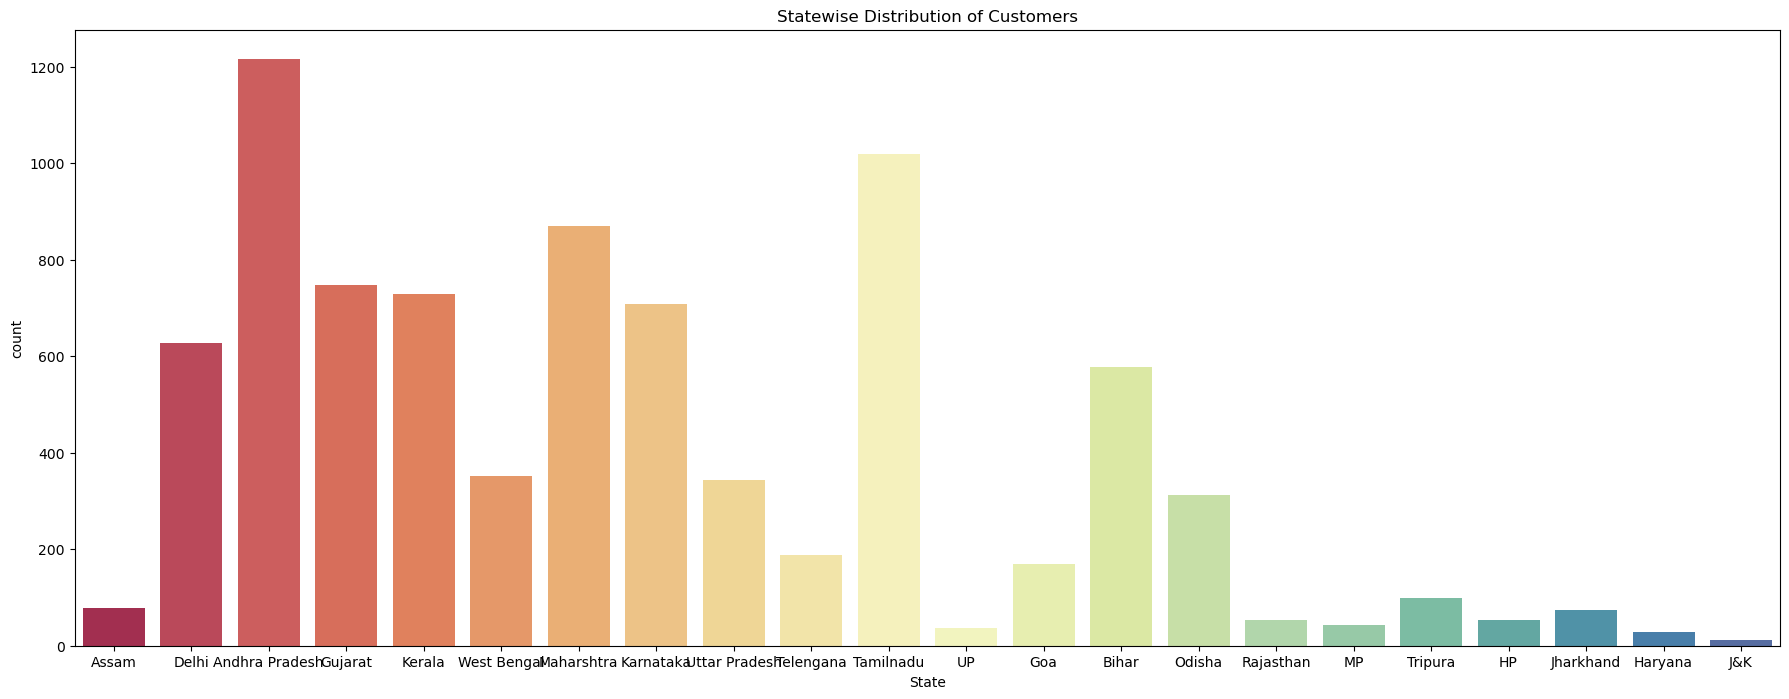

In [60]:
plt.figure(figsize=(22,8))
sns.countplot(x="State",data=df, palette="Spectral")
plt.title('Statewise Distribution of Customers')

**Andhrapradesh** have most customers with **J&K least** customers

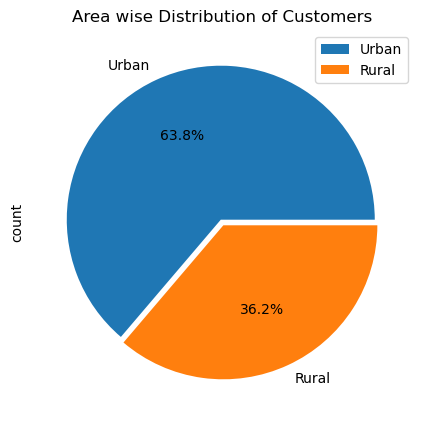

In [61]:
explode=[0.02]*2
plt.figure(figsize=(5,5))
df.Area.value_counts().plot(kind = 'pie',radius=1,autopct='%.1f%%',explode=explode)
plt.legend()
plt.title('Area wise Distribution of Customers')
plt.show()

- Most buyers are from urban area

- **Urban** section has most buyed products upto **5319**

Text(0.5, 1.0, 'Area wise Distribution of Customers with Claim')

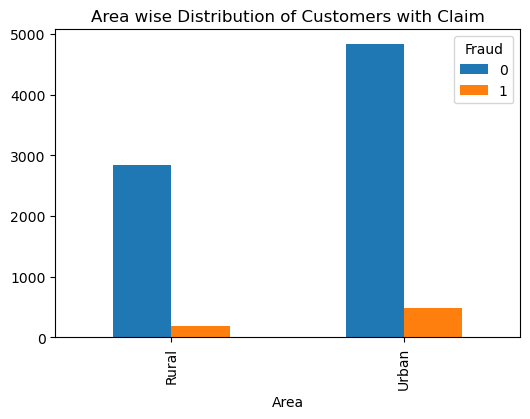

In [62]:
pd.crosstab(df.Area,df.Fraud).plot(kind="bar",figsize=(6, 4))
plt.title('Area wise Distribution of Customers with Claim')

-  **Urban has more fraud** claim than rural 

In [63]:
df['Consumer_profile'].value_counts()

Consumer_profile
Personal    4973
Business    3368
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers Consumer profile')

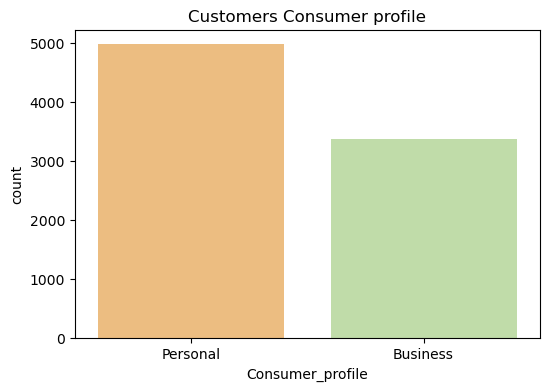

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x="Consumer_profile",data=df, palette="Spectral")
plt.title('Customers Consumer profile')

There are **4973 and 3368** Personal and Business Customers Respectively.    

Text(0.5, 1.0, 'Customer profile Distribution of Customers with Claim')

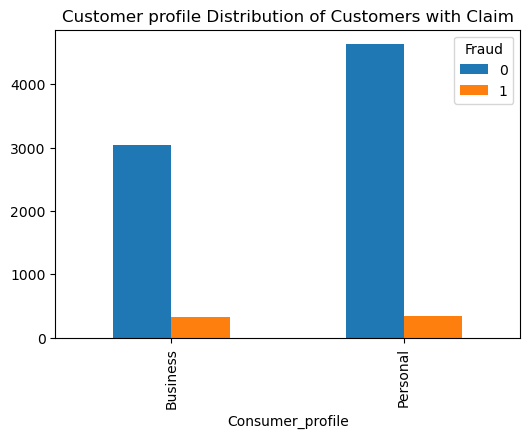

In [65]:
pd.crosstab(df.Consumer_profile,df.Fraud).plot(kind="bar",figsize=(6, 4))
plt.title('Customer profile Distribution of Customers with Claim')

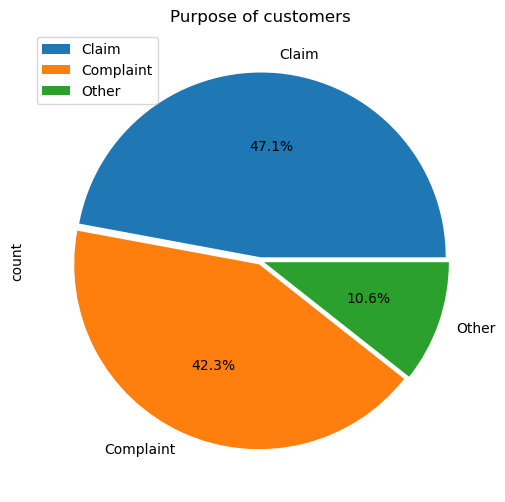

In [66]:
explode=[0.02]*3
plt.figure(figsize=(6,6))
df.Purpose.value_counts().plot(kind = 'pie',radius=1,autopct='%.1f%%',explode=explode)
plt.legend()
plt.title('Purpose of customers')
plt.show()

**47.1 %** of customers have registered for claim 

Text(0.5, 1.0, 'Purpose of customers')

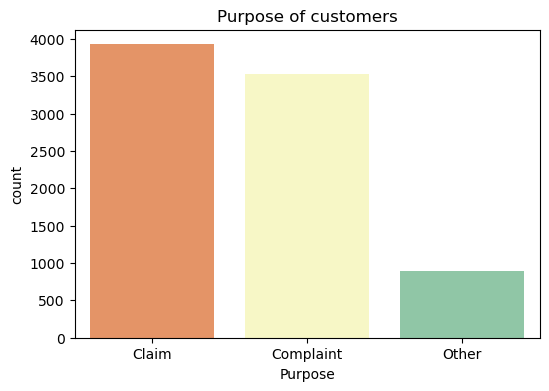

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x="Purpose",data=df, palette="Spectral")
plt.title('Purpose of customers')

In [68]:
df['Service_Centre'].value_counts()

Service_Centre
15    1954
12    1726
13    1627
10    1386
14    1239
11     378
16      31
Name: count, dtype: int64

Text(0.5, 1.0, 'Service center Distribution ')

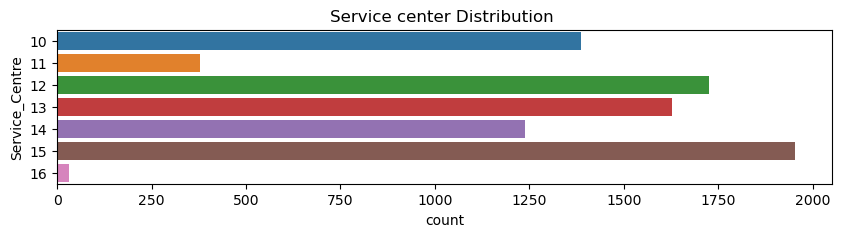

In [69]:
#Service_centre distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Service_Centre', data=df)
plt.title('Service center Distribution ')

Text(0.5, 1.0, 'Purchased from(seller) to customers')

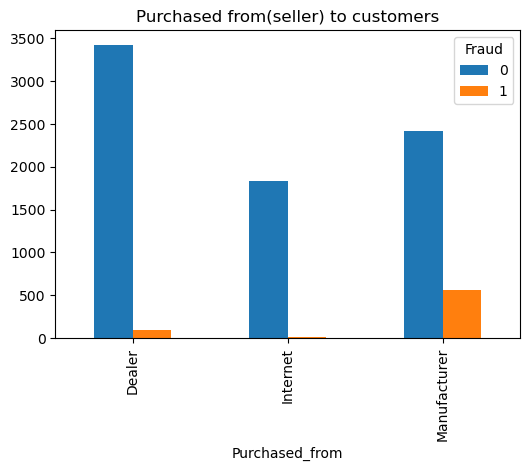

In [70]:
pd.crosstab(df.Purchased_from,df.Fraud).plot(kind="bar",figsize=(6, 4))
plt.title('Purchased from(seller) to customers')

**There is least fraud claim after purchasing from Internet**

In [71]:
# We will see how many unique value counts.
df.Fraud.value_counts()

Fraud
0    7675
1     666
Name: count, dtype: int64

- **'1'- fradulent claim**
- **'0' -  Genuine claim**

Text(0.5, 1.0, 'Number of Fraud/Genuine Claim')

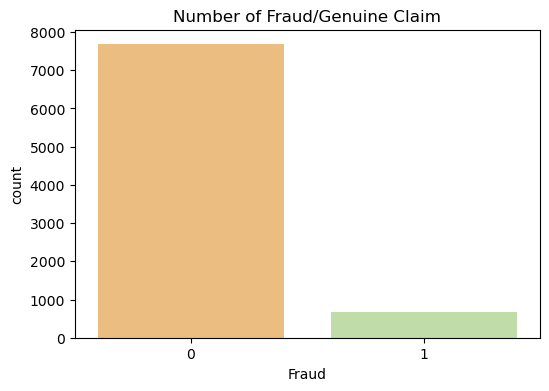

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fraud",data=df, palette="Spectral")
plt.title('Number of Fraud/Genuine Claim')

**There are 666 fraud claims outoff 8341 entries.**

Text(0.5, 1.0, 'Claim value for warranty')

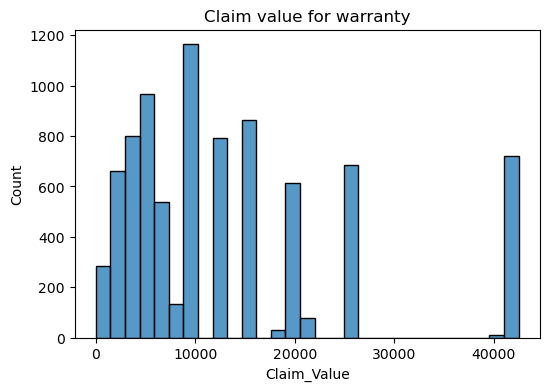

In [73]:
plt.figure(figsize=(6,4))
sns.histplot(x = 'Claim_Value', data = df)
plt.title('Claim value for warranty')


- **10k** is mostly claimed value after warranty
- Claim value **ranges between 0- 40000** Rs

Text(0.5, 1.0, 'Product Age Distribution')

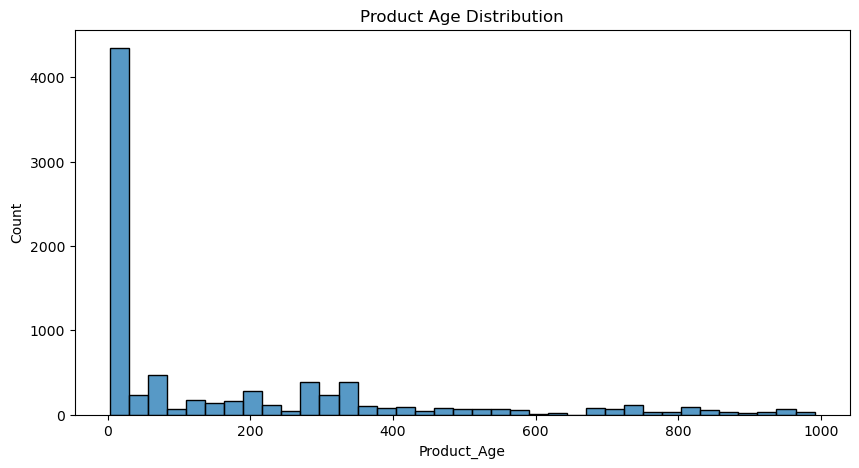

In [74]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'Product_Age' , data = df)
plt.title('Product Age Distribution')

- The age of product varies from **1 upto 991** days 

# . Warranty claim data

In [75]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [76]:
df.shape

(8341, 20)

In [77]:
df_copy = cp.deepcopy(df)

In [78]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            8341 non-null   object 
 1   State             8341 non-null   object 
 2   Area              8341 non-null   object 
 3   City              8341 non-null   object 
 4   Consumer_profile  8341 non-null   object 
 5   Product_category  8341 non-null   object 
 6   Product_type      8341 non-null   object 
 7   AC_1001_Issue     8341 non-null   int64  
 8   AC_1002_Issue     8341 non-null   int64  
 9   AC_1003_Issue     8341 non-null   int64  
 10  TV_2001_Issue     8341 non-null   int64  
 11  TV_2002_Issue     8341 non-null   int64  
 12  TV_2003_Issue     8341 non-null   int64  
 13  Claim_Value       8341 non-null   float64
 14  Service_Centre    8341 non-null   int64  
 15  Product_Age       8341 non-null   int64  
 16  Purchased_from    8341 non-null   object 


## Feature Selection

## Correlation Matrix

In [80]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                AC_1001_Issue  AC_1002_Issue  AC_1003_Issue  TV_2001_Issue  \
AC_1001_Issue        1.000000       0.456137       0.276664      -0.283081   
AC_1002_Issue        0.456137       1.000000       0.510574      -0.308733   
AC_1003_Issue        0.276664       0.510574       1.000000      -0.228961   
TV_2001_Issue       -0.283081      -0.308733      -0.228961       1.000000   
TV_2002_Issue       -0.317619      -0.346401      -0.256895       0.538470   
TV_2003_Issue       -0.254549      -0.277615      -0.205883       0.404855   
Claim_Value         -0.170286      -0.166172      -0.061677      -0.160307   
Service_Centre       0.108771       0.141690       0.054166      -0.035858   
Product_Age          0.029823       0.122035       0.123426       0.152686   
Call_details         0.055673       0.167593       0.109077       0.130165   
Fraud               -0.047167      -0.104843      -0.044674      -0.006736   

                TV_2002_Issue  TV_2003_Issue  Claim_Value  Serv

**No pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity.**
**'claim_value','component_issues' are mostly correlated with fraud attribute.**
**Column 'service_centre' is least correlated.**

### Label Encoding

In [82]:
cols = ['Region', 'State','Area', 'City', 'Consumer_profile','Product_category','Product_type','Purchased_from','Purpose']
#
# Encode labels of multiple columns at once
#
df_copy[cols] = df_copy[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_copy.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,2,1,0,8,1,1,0,0,1,2,0,0,0,4474.0,12,202,2,30.0,0,0
1,0,3,1,16,1,0,1,0,0,0,1,1,1,25000.0,13,60,0,1.3,1,0
2,7,0,0,9,0,1,0,0,0,0,0,0,0,10000.0,12,3,0,2.5,0,0
3,7,5,0,1,1,0,1,0,0,0,1,1,0,4216.0,10,672,0,25.0,2,0
4,6,11,0,11,0,1,0,0,0,0,0,0,0,20000.0,13,3,2,6.5,0,0


In [83]:
df_copy.shape

(8341, 20)

# Feature selection Chi sqaure Method

***In feature selection, we aim to select the features which are highly dependent on the response.***

In [84]:
## Null Hypothesis (H0): Two variables are independent.

## Alternate Hypothesis (H1): Two variables are not independent.

In [85]:
X = df_copy.loc[:,df.columns!='Fraud']
y = df_copy[['Fraud']]
selector = SelectKBest(chi2, k=15)
selector.fit(X, y)
X_new = selector.transform(X)
imp_feature = print(X.columns[selector.get_support(indices=True)])

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Product_Age',
       'Purchased_from', 'Call_details'],
      dtype='object')


In [86]:
X_new.shape

(8341, 15)

In [87]:
chi_scores = chi2(X,y)
chi_scores


(array([2.36610547e+01, 1.08896464e+01, 8.99721417e+00, 4.73961763e+01,
        8.30239413e+00, 7.89320294e+00, 6.54161524e+00, 2.26504561e+01,
        1.05160706e+02, 2.19489103e+01, 3.68667888e-01, 3.58909318e+01,
        5.04460852e+01, 1.61586232e+06, 2.07863438e-02, 2.65049430e+04,
        4.53017367e+02, 2.25734386e+02, 3.01484990e+00]),
 array([1.14884061e-006, 9.67032874e-004, 2.70391470e-003, 5.79957044e-012,
        3.95928502e-003, 4.96209144e-003, 1.05379627e-002, 1.94314088e-006,
        1.12621189e-024, 2.80005844e-006, 5.43731280e-001, 2.08677681e-009,
        1.22483895e-012, 0.00000000e+000, 8.85362520e-001, 0.00000000e+000,
        1.59022225e-100, 5.07737264e-051, 8.25050928e-002]))

**Higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.**

**Here first array represents chi square values and second array represnts p-values**

<Axes: >

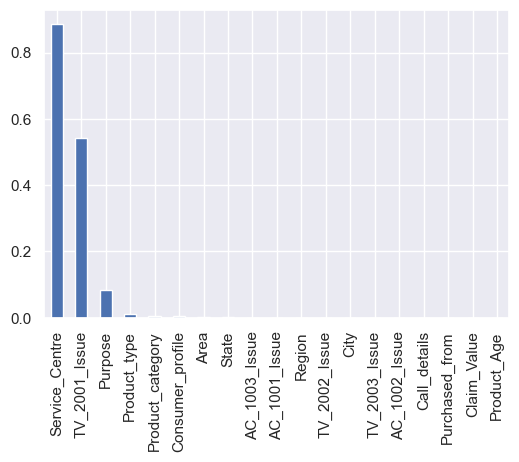

In [88]:
plt.figure(figsize=(6,4))
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

**Since first 3 columns has higher the p-value, it says that this variables is independent of the response and can not be considered for model training**

In [89]:
df_copy.drop(columns={'TV_2001_Issue','Service_Centre','Purpose'},inplace=True)

In [90]:
df_copy.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details,Fraud
0,2,1,0,8,1,1,0,0,1,2,0,0,4474.0,202,2,30.0,0
1,0,3,1,16,1,0,1,0,0,0,1,1,25000.0,60,0,1.3,0
2,7,0,0,9,0,1,0,0,0,0,0,0,10000.0,3,0,2.5,0
3,7,5,0,1,1,0,1,0,0,0,1,0,4216.0,672,0,25.0,0
4,6,11,0,11,0,1,0,0,0,0,0,0,20000.0,3,2,6.5,0


In [91]:
df_copy.shape

(8341, 17)

#######################################################

In [92]:
df_copy.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details,Fraud
0,2,1,0,8,1,1,0,0,1,2,0,0,4474.0,202,2,30.0,0
1,0,3,1,16,1,0,1,0,0,0,1,1,25000.0,60,0,1.3,0
2,7,0,0,9,0,1,0,0,0,0,0,0,10000.0,3,0,2.5,0
3,7,5,0,1,1,0,1,0,0,0,1,0,4216.0,672,0,25.0,0
4,6,11,0,11,0,1,0,0,0,0,0,0,20000.0,3,2,6.5,0


In [93]:
df_copy.shape

(8341, 17)

In [94]:
df_copy['Fraud'].value_counts()

Fraud
0    7675
1     666
Name: count, dtype: int64

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            8341 non-null   int32  
 1   State             8341 non-null   int32  
 2   Area              8341 non-null   int32  
 3   City              8341 non-null   int32  
 4   Consumer_profile  8341 non-null   int32  
 5   Product_category  8341 non-null   int32  
 6   Product_type      8341 non-null   int32  
 7   AC_1001_Issue     8341 non-null   int64  
 8   AC_1002_Issue     8341 non-null   int64  
 9   AC_1003_Issue     8341 non-null   int64  
 10  TV_2002_Issue     8341 non-null   int64  
 11  TV_2003_Issue     8341 non-null   int64  
 12  Claim_Value       8341 non-null   float64
 13  Product_Age       8341 non-null   int64  
 14  Purchased_from    8341 non-null   int32  
 15  Call_details      8341 non-null   float64
 16  Fraud             8341 non-null   int64  


**K-Fold Cross validation Before oversampling**

In [96]:
# # Separate input features and target
X1= df_copy.drop(['Fraud'],axis = 1)
y1= df_copy.Fraud

In [97]:
# setting up testing and training sets
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state = 42)

In [98]:
# Create  classifier object.
RF = RandomForestClassifier(n_estimators=101,criterion='gini',n_jobs=-1)
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)
 

In [99]:
# partition data
for train_index, test_index in skf.split(X1, y1):
    # specific ".loc" syntax for working with dataframes
    X_train, X_val = X1.loc[train_index], X1.loc[test_index]
    y_train, y_val = y1[train_index], y1[test_index]

In [100]:
scores = cross_val_score(RF, X1, y1, cv = skf)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97004194 0.97601918 0.97901679 0.97841727 0.97721823]
Average CV Score:  0.9761426808223883
Number of CV Scores used in Average:  5


_______________________________________________

 # **Balancing data: Random_oversampling**

In [101]:
## Oversampling : Balancing the data (imblearn)

In [102]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)

**Defining independent and dependent variable**

In [103]:
# # Separate input features and target
X= df_copy.drop(['Fraud'],axis = 1)
y= df_copy.Fraud

In [104]:
X

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,2,1,0,8,1,1,0,0,1,2,0,0,4474.0,202,2,30.0
1,0,3,1,16,1,0,1,0,0,0,1,1,25000.0,60,0,1.3
2,7,0,0,9,0,1,0,0,0,0,0,0,10000.0,3,0,2.5
3,7,5,0,1,1,0,1,0,0,0,1,0,4216.0,672,0,25.0
4,6,11,0,11,0,1,0,0,0,0,0,0,20000.0,3,2,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,3,5,1,24,1,1,0,0,1,1,0,0,10000.0,15,0,2.6
8337,0,16,0,6,1,1,0,0,0,0,0,0,42500.0,4,2,1.3
8338,5,14,1,4,1,1,0,0,1,0,0,0,2000.0,61,0,24.0
8339,4,16,1,6,1,1,0,1,1,1,0,0,6000.0,280,0,21.0


In [105]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8336    0
8337    0
8338    0
8339    0
8340    0
Name: Fraud, Length: 8341, dtype: int64

In [106]:
X, y = ros.fit_resample(X, y)

In [107]:
X

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,2,1,0,8,1,1,0,0,1,2,0,0,4474.0,202,2,30.0
1,0,3,1,16,1,0,1,0,0,0,1,1,25000.0,60,0,1.3
2,7,0,0,9,0,1,0,0,0,0,0,0,10000.0,3,0,2.5
3,7,5,0,1,1,0,1,0,0,0,1,0,4216.0,672,0,25.0
4,6,11,0,11,0,1,0,0,0,0,0,0,20000.0,3,2,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15345,4,10,1,2,0,1,0,0,0,1,0,0,42500.0,18,2,2.4
15346,0,0,1,9,1,0,1,0,0,0,0,2,42500.0,18,2,0.5
15347,4,10,1,2,0,0,1,0,0,0,2,0,15000.0,60,2,0.5
15348,7,13,1,15,0,1,0,2,0,0,0,0,5000.0,49,1,22.0


In [108]:
# X.to_csv("C:/Users/Anik8/Desktop/fraud/x_balance.csv")

In [109]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15345    1
15346    1
15347    1
15348    1
15349    1
Name: Fraud, Length: 15350, dtype: int64

In [110]:
y.value_counts()

Fraud
0    7675
1    7675
Name: count, dtype: int64

**Splitting the train dataset**

In [111]:
# setting up testing and training sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [112]:
X_train.shape

(12280, 16)

In [113]:
X_val.shape

(3070, 16)

In [114]:
y_train.shape

(12280,)

In [115]:
y_val.shape

(3070,)

**Scaling**

In [116]:
X.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value',
       'Product_Age', 'Purchased_from', 'Call_details'],
      dtype='object')

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
X= scaler.fit_transform(X.to_numpy())
X= pd.DataFrame(X, columns=['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category','Product_type', 'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value',
       'Product_Age', 'Purchased_from', 'Call_details'])
 
print("Scaled Dataset Using MinMaxScaler")
X.head()

Scaled Dataset Using MinMaxScaler


,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,0.285714,0.047619,0.0,0.307692,1.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.105271,0.201417,1.0,1.000000
1,0.000000,0.142857,1.0,0.615385,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.588235,0.057692,0.0,0.027119
2,1.000000,0.000000,0.0,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.000000,0.0,0.067797
3,1.000000,0.238095,0.0,0.038462,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.099200,0.677126,0.0,0.830508
4,0.857143,0.523810,0.0,0.423077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.000000,1.0,0.203390


In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15350 entries, 0 to 15349
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            15350 non-null  float64
 1   State             15350 non-null  float64
 2   Area              15350 non-null  float64
 3   City              15350 non-null  float64
 4   Consumer_profile  15350 non-null  float64
 5   Product_category  15350 non-null  float64
 6   Product_type      15350 non-null  float64
 7   AC_1001_Issue     15350 non-null  float64
 8   AC_1002_Issue     15350 non-null  float64
 9   AC_1003_Issue     15350 non-null  float64
 10  TV_2002_Issue     15350 non-null  float64
 11  TV_2003_Issue     15350 non-null  float64
 12  Claim_Value       15350 non-null  float64
 13  Product_Age       15350 non-null  float64
 14  Purchased_from    15350 non-null  float64
 15  Call_details      15350 non-null  float64
dtypes: float64(16)
memory usage: 1.9 MB


In [119]:
X.shape

(15350, 16)

**K-Fold cross validation after oversampling**

In [120]:
# Create  classifier object.
RF = RandomForestClassifier(n_estimators=101,criterion='gini',n_jobs=-1)
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)
  

In [121]:
# partition data
for train_index, test_index in skf.split(X, y):
    # specific ".loc" syntax for working with dataframes
    X_train, X_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]

In [122]:
scores = cross_val_score(RF, X, y, cv = skf)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97003257 0.96644951 0.96970684 0.96872964 0.96938111]
Average CV Score:  0.9688599348534203
Number of CV Scores used in Average:  5


In [123]:
X_train

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,0.285714,0.047619,0.0,0.307692,1.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.105271,0.201417,1.0,1.000000
1,0.000000,0.142857,1.0,0.615385,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.588235,0.057692,0.0,0.027119
2,1.000000,0.000000,0.0,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.000000,0.0,0.067797
3,1.000000,0.238095,0.0,0.038462,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.099200,0.677126,0.0,0.830508
4,0.857143,0.523810,0.0,0.423077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,0.000000,1.0,0.203390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15344,1.000000,0.619048,0.0,0.576923,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.470588,0.015182,1.0,0.067797
15345,0.571429,0.476190,1.0,0.076923,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.015182,1.0,0.064407
15346,0.000000,0.000000,1.0,0.346154,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.015182,1.0,0.000000
15348,1.000000,0.619048,1.0,0.576923,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.117647,0.046559,0.5,0.728814


In [124]:
train_index.size

12280

In [125]:
test_index.size

3070

**_Test Dataset csv_**

In [130]:
test=pd.read_csv("test_1 .csv")

In [132]:
test.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,775,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim
1,3130,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,20000.0,13,14,Manufacturer,1.4,Claim
2,93341,West,Gujarat,Rural,Ahmedabad,Business,Entertainment,TV,0,0,0,1,1,1,NaN,11,408,Dealer,30.0,Claim
3,9498,North East,Uttar Pradesh,Urban,Lucknow,Business,Household,AC,1,0,0,0,0,0,2000.0,10,148,Manufacturer,24.0,Claim
4,78191,North East,Uttar Pradesh,Urban,Lucknow,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,10,125,Internet,1.0,Complaint


In [133]:
test.describe()

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details
count,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3483.000000,3576.000000,3576.000000,3576.000000
mean,13082.766219,0.263143,0.301174,0.184284,0.337808,0.427293,0.284116,14709.682171,12.832774,155.949385,10.203803
std,21333.670325,0.557061,0.583847,0.485181,0.571081,0.652289,0.543323,13816.391255,1.745804,227.128165,11.393538
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000
25%,3026.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,10.000000,1.400000
50%,5875.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000
75%,8911.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20000.000000,14.000000,274.000000,21.000000
max,99251.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000


In [134]:
test.drop(['Unnamed: 0','TV_2001_Issue','Service_Centre','Purpose'],axis = 1,inplace = True)

In [135]:
cols = ['Region', 'State','Area', 'City', 'Consumer_profile','Product_category','Purchased_from','Product_type']
#
# Encode labels of multiple columns at once
#
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
test.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,6,0,1,9,0,0,1,0,0,0,1,1,10000.0,5,0,2.6
1,6,0,1,9,0,0,1,0,0,0,1,1,20000.0,14,2,1.4
2,7,5,0,1,0,0,1,0,0,0,1,1,NaN,408,0,30.0
3,2,20,1,13,0,1,0,1,0,0,0,0,2000.0,148,2,24.0
4,2,20,1,13,1,0,1,0,0,0,0,0,0.0,125,1,1.0


In [136]:
test.isna().sum()

Region               0
State                0
Area                 0
City                 0
Consumer_profile     0
Product_category     0
Product_type         0
AC_1001_Issue        0
AC_1002_Issue        0
AC_1003_Issue        0
TV_2002_Issue        0
TV_2003_Issue        0
Claim_Value         93
Product_Age          0
Purchased_from       0
Call_details         0
dtype: int64

In [137]:
test.fillna(test['Claim_Value'].median(),inplace = True)

In [138]:
test.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Product_Age         0
Purchased_from      0
Call_details        0
dtype: int64

In [139]:
test_df= cp.deepcopy(test)

**Scaling Test csv**

In [140]:
scaler = MinMaxScaler() # use min-max standardization for numerical features
 
test= scaler.fit_transform(test.to_numpy())
test= pd.DataFrame(test, columns=['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category','Product_type', 'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value',
       'Product_Age', 'Purchased_from', 'Call_details'])
 
print("Scaled Dataset Using MinMaxScaler")
test.head()

Scaled Dataset Using MinMaxScaler


,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,0.857143,0.000000,1.0,0.346154,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.20,0.002024,0.0,0.071186
1,0.857143,0.000000,1.0,0.346154,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.40,0.011134,1.0,0.030508
2,1.000000,0.238095,0.0,0.038462,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.20,0.409919,0.0,1.000000
3,0.285714,0.952381,1.0,0.500000,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.04,0.146761,1.0,0.796610
4,0.285714,0.952381,1.0,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.123482,0.5,0.016949


In [141]:
test.shape

(3576, 16)

# ***Model Building***

**1) Logistic Regression**

In [142]:
Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)
y_predict1 = Model_lr.predict(X_val)

In [143]:
from sklearn import metrics
mat = metrics.confusion_matrix(y_val, y_predict1)
print("Confusion Matix : \n",mat)
f1_log=(f1_score(y_val, y_predict1))
print("\n")
print("F1_Score :",f1_log*100)
acc_log=accuracy_score(y_val, y_predict1)*100
print('Accuracy :',acc_log)

#calculating precision and reall
precision = precision_score(y_val, y_predict1)
recall = recall_score(y_val, y_predict1)
 
print('Precision: ',precision)
print('Recall: ',recall)

Confusion Matix : 
 [[1111  424]
 [ 242 1293]]


F1_Score : 79.52029520295203
Accuracy : 78.30618892508143
Precision:  0.7530576587070472
Recall:  0.8423452768729641


**2) KNN**

In [144]:
Model_knn = KNeighborsClassifier(n_neighbors = 11)
Model_knn.fit(X_train, y_train)
y_predict2 = Model_knn.predict(X_val)

In [145]:
mat = metrics.confusion_matrix(y_val, y_predict2)
print("Confusion Matix : \n",mat)
f1_knn=(f1_score(y_val, y_predict2))
print("\n")
print("F1_Score :",f1_knn*100)
acc_knn=accuracy_score(y_val, y_predict2)*100
print('Accuracy :',acc_knn)

Confusion Matix : 
 [[1510   25]
 [ 224 1311]]


F1_Score : 91.32706374085686
Accuracy : 91.88925081433224


**3) Random Forest**

In [146]:
Model_rf = RandomForestClassifier(n_estimators=100)
Model_rf.fit(X_train, y_train)
y_predict3 = Model_rf.predict(X_val)

In [147]:
mat = metrics.confusion_matrix(y_val, y_predict3)
print("Confusion Matix : \n",mat)
f1_rf=(f1_score(y_val, y_predict3))
print("\n")
print("F1_Score :",f1_rf*100)
acc_random_forest = accuracy_score(y_val, y_predict3) * 100
print('Accuracy :',acc_random_forest)

Confusion Matix : 
 [[1441   94]
 [   0 1535]]


F1_Score : 97.0290771175727
Accuracy : 96.93811074918567


In [148]:
print(classification_report(y_val, y_predict3))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1535
           1       0.94      1.00      0.97      1535

    accuracy                           0.97      3070
   macro avg       0.97      0.97      0.97      3070
weighted avg       0.97      0.97      0.97      3070



**4) SVM**

In [149]:
Model_svc = SVC()
Model_svc.fit(X_train, y_train)
y_predict4 = Model_svc.predict(X_val)
mat = metrics.confusion_matrix(y_val, y_predict4)
print("Confusion Matix : \n",mat)
f1_svm=(f1_score(y_val, y_predict4))
print("\n")
print("F1_Score :",f1_svm*100)
acc_svm = accuracy_score(y_val, y_predict4) * 100
print('Accuracy :',acc_svm)

Confusion Matix : 
 [[1448   87]
 [   3 1532]]


F1_Score : 97.14648065948002
Accuracy : 97.06840390879479


In [150]:
print(classification_report(y_val, y_predict4))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1535
           1       0.95      1.00      0.97      1535

    accuracy                           0.97      3070
   macro avg       0.97      0.97      0.97      3070
weighted avg       0.97      0.97      0.97      3070



**5) Decision tree**

In [151]:
Model_dt = DecisionTreeClassifier()
Model_dt.fit(X_train, y_train)
y_predict5 = Model_dt.predict(X_val)
mat = metrics.confusion_matrix(y_val, y_predict5)
print("Confusion Matix : \n",mat)
f1_dt=(f1_score(y_val, y_predict5))
print("\n")
print("F1_Score :",f1_dt*100)
acc_dt = accuracy_score(y_val, y_predict5) * 100
print('Accuracy :',acc_dt)

Confusion Matix : 
 [[1440   95]
 [   0 1535]]


F1_Score : 96.99842022116904
Accuracy : 96.90553745928338


# MODEL EVALUTION

In [155]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN', 'Random Forest','Support vector Machine' ,'Decision Tree'],
    'F1 Score': [f1_log,f1_knn,f1_rf,f1_svm,f1_dt],
     'Accuracy': [acc_log,acc_knn,acc_random_forest,acc_svm,acc_dt] })
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score,Accuracy
3,Support vector Machine,0.971465,97.068404
2,Random Forest,0.970291,96.938111
4,Decision Tree,0.969984,96.905537
1,KNN,0.913271,91.889251
0,Logistic Regression,0.795203,78.306189


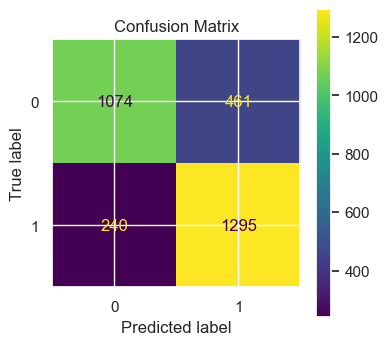

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
fig, ax = plt.subplots(figsize=(4,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(mat, display_labels=Model_svc.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations 
display.plot(ax=ax);

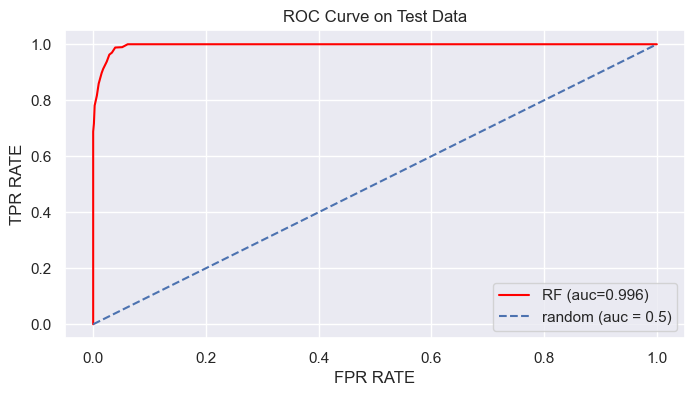

In [157]:
y_pred_proba = Model_rf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_val, y_pred_proba),3)
plt.rcParams["figure.figsize"] = [8, 4]
plt.plot(fpr,tpr,label="RF (auc="+str(auc)+')', color='red')
plt.plot([0, 1], [0, 1], label='random (auc = 0.5)', linestyle='--')
plt.title('ROC Curve on Test Data')
plt.xlabel('FPR RATE')
plt.ylabel('TPR RATE')
plt.legend(loc=4)
plt.show()

Receiver Operating Characteristic.

## Now predicting on test csv

In [158]:
test.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details
0,0.857143,0.000000,1.0,0.346154,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.20,0.002024,0.0,0.071186
1,0.857143,0.000000,1.0,0.346154,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.40,0.011134,1.0,0.030508
2,1.000000,0.238095,0.0,0.038462,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.20,0.409919,0.0,1.000000
3,0.285714,0.952381,1.0,0.500000,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.04,0.146761,1.0,0.796610
4,0.285714,0.952381,1.0,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.123482,0.5,0.016949


In [159]:
predicted_class = Model_rf.predict(test)

In [160]:
predicted_class

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
test_id = pd.read_csv("test_1 .csv")

In [165]:
test_df= cp.deepcopy(test_id)

In [166]:
test_df.fillna(test_df['Claim_Value'].median(),inplace = True)

In [167]:
test_df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

In [168]:
last_predict = pd.DataFrame({'Id': test_id['Unnamed: 0'], 'Fraud': predicted_class})

# .  Predicted Fraud claim on test data

In [169]:
last_predict.head(10)

,Id,Fraud
0,775,0
1,3130,1
2,93341,0
3,9498,1
4,78191,0
5,1775,0
6,9382,0
7,434,0
8,5029,0
9,8653,0


In [170]:
last_predict['Fraud'].value_counts()

Fraud
0    3256
1     320
Name: count, dtype: int64

## Final Result : There are 320 fraudulent claims & 3256 Genuine Claim

In [171]:
final=pd.merge(test_df,last_predict,how="outer", on=["Id"])

In [172]:
final.head()

,Id,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,2,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
1,3,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
2,4,South,Tamilnadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
3,5,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0
4,8,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim,0


In [173]:
final.shape

(3576, 21)

Text(0.5, 1.0, 'Fraud Count')

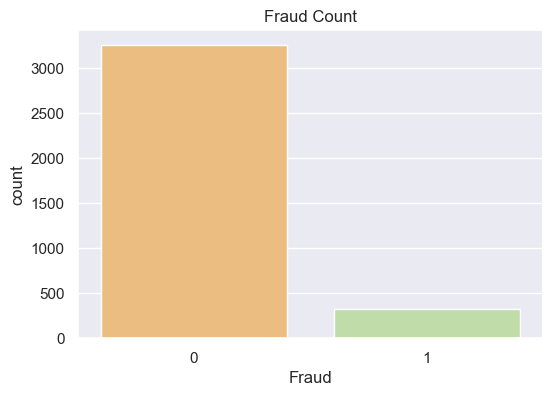

In [174]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fraud",data=final, palette="Spectral")
plt.title('Fraud Count')

Text(0.5, 1.0, 'Product type Distribution with Claim')

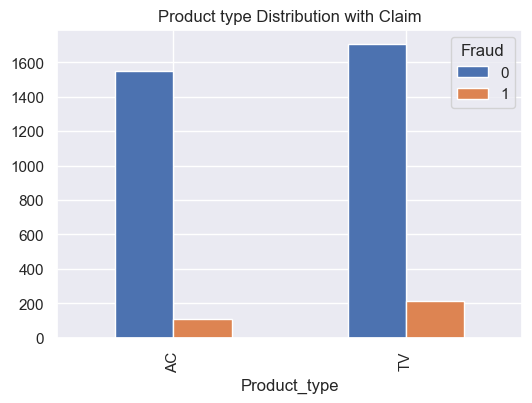

In [175]:
pd.crosstab(final.Product_type,final.Fraud).plot(kind="bar",figsize=(6, 4))
plt.title('Product type Distribution with Claim')

#####################################################